# Exercise 2.1: Speed of convergence in Predictive Coding
## Group 4

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# constants to be used in all calculations
sigma_pr = 1
mu_pr = 3
sigma_gen = 1
y = 2

In [3]:
# let's define prior and generation as function of x
# values for the other relevant parameters are already given
def prior(x):
    px = 1/np.sqrt(2*np.pi*sigma_pr) * np.exp(-0.5*(x-mu_pr)**2 / sigma_pr)
    return px

def likelihood(x, y=2):
    pyx = 1/np.sqrt(2*np.pi*sigma_gen) * np.exp(-0.5*(x**2 - y)**2 / sigma_gen)
    return pyx

def F(x):
    return np.log(likelihood(x)) + np.log(prior(x))

**(a) Plot posterior and $F(x)$ for $x \in [0,4]$. Is the posterior normal?**

*We assumed that it refered to the likelihood, as the posterior can not be computed as we can not compute the normalization term, the evidence. Moreover, the log posterior is just a vertical displacement of $F(x)$ (adding $-log(p(y))$ to $F(x)$ ) so the shape is still the same, and clearly not normal.*

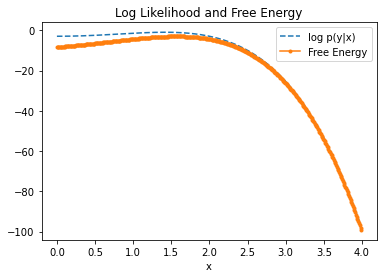

In [4]:
plt.figure()
x_vector = np.arange(0,4,0.01)
plt.plot(x_vector, np.log(likelihood(x_vector)),'--',label='log p(y|x)')
plt.plot(x_vector, F(x_vector),'.-',label='Free Energy')
plt.legend()
plt.xlabel('x')
plt.title('Log Likelihood and Free Energy')
plt.show()

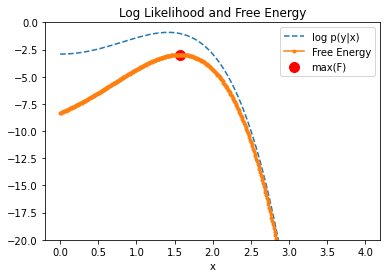

The maximum of F(x) is at x= 1.57


In [5]:
plt.figure()
x_vector = np.arange(0,4,0.01)
plt.plot(x_vector, np.log(likelihood(x_vector)),'--',label='log p(y|x)')
plt.plot(x_vector, F(x_vector),'.-',label='Free Energy')
plt.scatter(x_vector[np.argmax(F(x_vector))], np.max(F(x_vector)), c='r', s=100, label='max(F)')
plt.ylim(-20,0)
plt.legend()
plt.xlabel('x')
plt.title('Log Likelihood and Free Energy')
plt.show()
print('The maximum of F(x) is at x=', x_vector[np.argmax(F(x_vector))])

**(b) Determine $\phi_0$ by direct gradient ascent**

In [6]:
stepsize = 0.01
T = 1000
phi = np.zeros((T,))
phi[0] = mu_pr

for t in range(T-1):
    dF = 2*phi[t]*(y-(phi[t]**2))/sigma_gen + (mu_pr - phi[t])/sigma_pr
    phi[t+1] = phi[t] + stepsize * dF
print('Final value ($\phi_0$): ',phi[-1])

Final value ($\phi_0$):  1.567468374852423


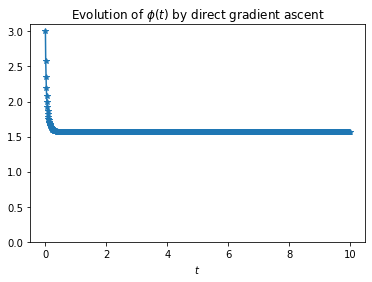

In [7]:
plt.figure()
plt.plot(np.arange(T)*stepsize, phi, '-*')
plt.xlabel('$t$')
plt.ylim(0,3.1)
plt.title('Evolution of $\phi(t)$ by direct gradient ascent')
plt.show()

**(c) Determine $\phi_0$ with prediction errors**

In [8]:
phi_vector = np.zeros((T,))
phi_vector[0] = mu_pr
eps_gen_vector = np.zeros((T,))
eps_pr_vector = np.zeros((T,))
phi[0] = 3  # mu_pr = 3

def timestep(phi, eps_gen, eps_pr, stepsize=0.01, y=2):
    sigma_pr = 1
    mu_pr = 3
    sigma_gen = 1
    
    dphi = eps_gen * 2*phi + eps_pr
    new_phi = phi + stepsize * dphi
    
    deps_gen = y - phi**2 - sigma_gen*eps_gen
    new_eps_gen = eps_gen + stepsize * deps_gen
    
    deps_pr = mu_pr - phi - sigma_pr * eps_pr
    new_eps_pr = eps_pr + stepsize * deps_pr
    
    return new_phi, new_eps_gen, new_eps_pr

for t in range(T-1):
    phi_vector[t+1], eps_gen_vector[t+1], eps_pr_vector[t+1] = timestep(phi_vector[t], eps_gen_vector[t], eps_pr_vector[t], stepsize)
    
print('Final value ($\phi_0$): ',phi_vector[-1])

Final value ($\phi_0$):  1.5674605723391817


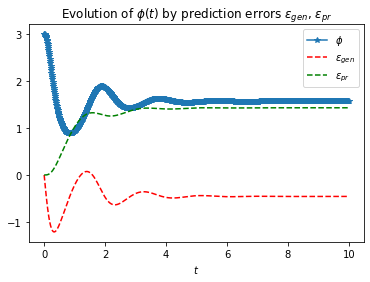

In [9]:
plt.figure()
plt.plot(np.arange(T)*stepsize, phi_vector, '-*',label='$\phi$')
plt.plot(np.arange(T)*stepsize, eps_gen_vector, 'r--', label='$\epsilon_{gen}$')
plt.plot(np.arange(T)*stepsize, eps_pr_vector, 'g--', label='$\epsilon_{pr}$')
plt.xlabel('$t$')
plt.legend()
plt.title('Evolution of $\phi(t)$ by prediction errors $\epsilon_{gen}$, $\epsilon_{pr}$ ')
plt.show()

**(d) Which of the two methods used in (b) and (c) converges faster? Why?**

*We can see that both methods converge to the correct value, but direct gradient ascent converges much faster. A plausible explanation is that gradient ascent is an exact, analytical method that is however too complex to be implemented in a neural circuit. Meanwhile, the method of prediction errors uses additional differential equations to approximate this gradient ascent, and these additional dynamics make it slower. Nevertheless, it has the advantage that it could be implemented by a neural circuit.*